### Package pour la récupération de paroles de chansons :

In [1]:
!pip install transformers


In [2]:
!pip install torch torchvision torchaudio

In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# charger le modèle de classification de sentiment
classifier = pipeline('sentiment-analysis')

# charger le modèle de résumé
summarizer = pipeline('summarization')

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model_revision = "af0f99b"

tokenizer = AutoTokenizer.from_pretrained(model_name, revision=model_revision)
model = AutoModelForSequenceClassification.from_pretrained(model_name, revision=model_revision)

classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# charger le fichier CSV contenant les paroles de chansons
df = pd.read_csv('my_data.csv')

# supprimer les lignes avec des valeurs manquantes
df = df.dropna()

# extraire le sentiment de chaque chanson
df['Sentiment'] = df['Paroles'].apply(lambda x: classifier(x)[0]['label'])

# résumer chaque chanson
df['Summary'] = df['Paroles'].apply(lambda x: summarizer(x, max_length=50, min_length=10, do_sample=False)[0]['summary_text'])

# afficher le dataframe
print(df)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\wilbi\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wilbi\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xform

Token indices sequence length is longer than the specified maximum sequence length for this model (651 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (651) must match the size of tensor b (512) at non-singleton dimension 1

In [5]:
import numpy as np
# Diviser le DataFrame en 10 parties égales
dfs = np.array_split(df, 100)


In [9]:
df = dfs[0]

In [11]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# charger le modèle et le tokenizer
model_name = 't5-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# définir la longueur maximale pour le modèle
max_length = 1024

# tronquer les entrées pour qu'elles ne dépassent pas la longueur maximale
def summarizer(text):
    inputs = tokenizer.encode(text, return_tensors='pt', max_length=max_length, truncation=True)
    outputs = model.generate(inputs)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary


C:\Users\wilbi\Anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [15]:
from transformers import pipeline
import pandas as pd

# Charger le modèle T5
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

# résumer chaque chanson avec max_length=50
df['Summary'] = df['Paroles'].apply(lambda x: summarizer(x, max_length=50, min_length=10, no_repeat_ngram_size=2, num_beams=4, early_stopping=True)[0]['summary_text'])

# Afficher le dataframe
print(df)


All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (893 > 512). Running this sequence through the model will result in indexing errors


    Unnamed: 0.1                                                Nom  \
0              0                                          As It Was   
1              1                                         Heat Waves   
3              3                                    Me Porto Bonito   
4              4                                   Tití Me Preguntó   
5              5                            Cold Heart - PNAU Remix   
6              6  Enemy (with JID) - from the series Arcane Leag...   
8              8                                      Ojitos Lindos   
9              9  Running Up That Hill (A Deal With God) - 2018 ...   
12            12                                             Efecto   
13            13                                              Ghost   
14            14                                      Glimpse of Us   
15            15                                        Moscow Mule   
16            16                                            Shivers   
17    

In [16]:
df

,Unnamed: 0.1,Nom,Artiste,Genre,Annee,Paroles,country_mb,Summary
0,0,As It Was,Harry Styles,pop,2022,[Intro] Come on Harry we wanna say goodn...,United Kingdom,Coco Jones 'ICU' performs live on the open mic...
1,1,Heat Waves,Glass Animals,pop,2022,[Intro] (Last night all I think about is y...,United Kingdom,[Chorus] Sometimes all I think about is you La...
3,3,Me Porto Bonito,Bad Bunny,reggae,2022,"[Letra de ""Me Porto Bonito""] [Intro: Bad ...",United States,'Me Porto Bonito' is a song by the late bad bu...
4,4,Tití Me Preguntó,Bad Bunny,reggae,2022,"[Letra de ""Tití Me Preguntó""] [Intro: Bad...",United States,"""Tit me preguntó si tengo mucha' novia' je far..."
5,5,Cold Heart - PNAU Remix,Elton John,rock,2022,[Intro]. (Oh). (Oh). (You're my cold heart). (...,United Kingdom,"[Pre-Chorus: Dua Lipa with Elton John]. Cold, ..."
6,6,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,rock,2022,[Intro: Dan Reynolds] Look out for yourself ...,United States,"""look out for yourself"" is a live performance ..."
8,8,Ojitos Lindos,Bad Bunny,reggae,2022,"[Letra de ""Ojitos Lindos""] [Verso 1: Li S...",United States,Li Saumet & Bad Bunny play 'ojitos lindo' on a...
9,9,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,pop,2022,[Brian McGrane - Take Your Time](). [Clodagh -...,United Kingdom,[Brian McGrane - When We Were Young](). [Clout...
12,12,Efecto,Bad Bunny,reggae,2022,"[Letra de ""Efecto""] [Intro] Yeah-yeah-y...",United States,[Pre-Coro] No sé si es casualidad que yo me si...
13,13,Ghost,Justin Bieber,pop,2022,[Verse 1] Youngblood thinks there's always t...,Canada,Coco Jones 'ICU' thinks there's always tomorro...


In [18]:
df.loc[df.index[12], 'Summary']

"[Pre-Chorus] Official Lyrics & Meaning | Verified . [Verse 2] I can't get enough I know you could tear me apart Put me back together and take my heart I never thought"

In [21]:
import re

def preprocess_text(text):
    # remove non-ascii characters
    text = text.encode('ascii', 'ignore').decode()
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


In [22]:
df['Paroles'] = df['Paroles'].apply(preprocess_text)


     ------------------------------------ 153.3/153.3 kB 537.8 kB/s eta 0:00:00


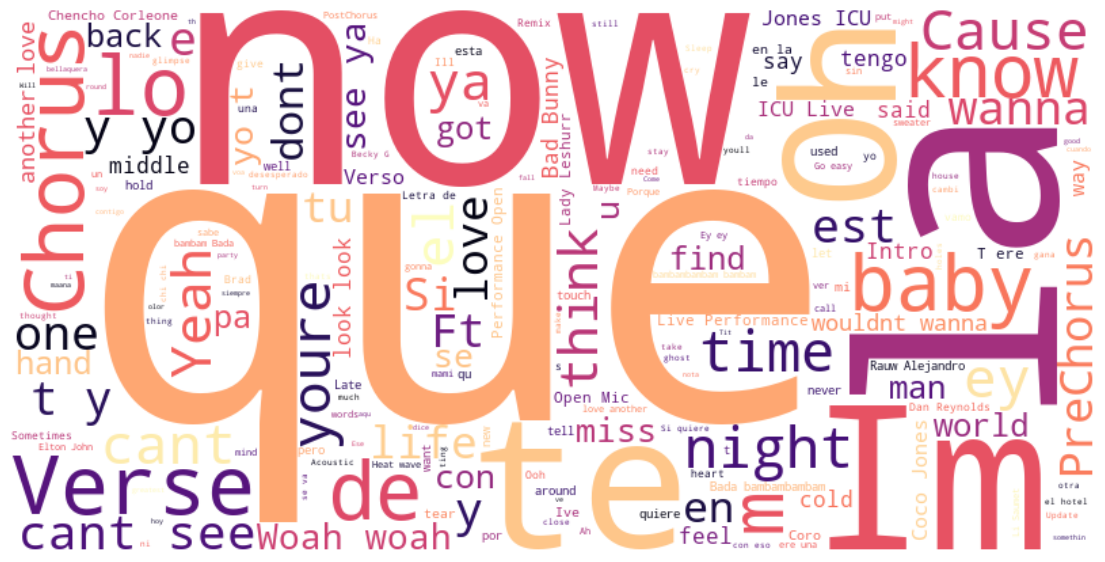

In [25]:
!pip install wordcloud
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concaténer toutes les paroles dans une seule chaîne de caractères
all_lyrics = " ".join(df['Paroles'].tolist())

# Créer l'objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma', stopwords=None).generate(all_lyrics)

# Afficher le WordCloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

